In [1]:
!pip3 install torch torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from torch import nn
import torch.nn.functional as F
import numpy as np

In [13]:
transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,),(0.5,))
    ]) # normalize mean value: 0.5, standard deviation: 0.5
training_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
validation_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
# training_dataset

training_loader = torch.utils.data.DataLoader(dataset=training_dataset, batch_size=100, shuffle=True) # divide to smaller batches because training 60000 images at once is too big to process
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=100, shuffle=False)

In [4]:
def im_convert(tensor):
  image = tensor.clone().detach().numpy()
  # print(image.shape)
  image = image.transpose(1, 2, 0) # 28, 28, 1
  # print(image.shape)
  # print('-------------original----------------')
  # print(image)
  # print('--------------change---------------')
  image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5)) # denormalize to show image, normalization is consist of subtract mean and divding by the standard deviation
                                                                        # to denormalize, multiply by standard deviation and add the mean
  # print(image)
  # print('----------------end-------------')
  image = image.clip(0, 1) # restric min and max values
  return image

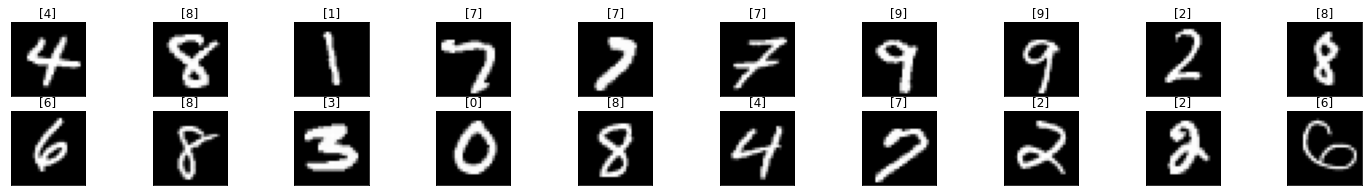

In [5]:
dataiter = iter(training_loader)
images, labels = dataiter.next()
fig = plt.figure(figsize=(25, 3))

for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(im_convert(images[idx]))
  ax.set_title([labels[idx].item()])


In [6]:
class Classifier(nn.Module):
  def __init__(self, D_in, H1, H2, D_out):
    super().__init__()
    self.linear1 = nn.Linear(D_in, H1)
    self.linear2 = nn.Linear(H1, H2)
    self.linear3 = nn.Linear(H2, D_out)

  def forward(self, x):
    x = F.relu(self.linear1(x))
    x = F.relu(self.linear2(x))
    x = self.linear3(x)
    return x

In [7]:
model = Classifier(784,125, 65, 10)

In [8]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001)

In [9]:
epochs = 15
running_loss_history = []
running_corrects_history = []
val_running_loss_history = []
val_running_corrects_history = []

for e in range(epochs):
  running_loss = 0.0
  running_corrects = 0.0
  val_running_loss = 0.0
  val_running_corrects = 0.0

  for inputs, labels in training_loader:
    inputs = inputs.view(inputs.shape[0], -1) # 1, 28, 28 -> 1, 784
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    _, preds = torch.max(outputs, 1)
    running_loss += loss.item()
    running_corrects += torch.sum(preds == labels.data)

    
  else: # else section will be called after for loop
    with torch.no_grad(): # set all the grad flags to be false. It meams this block of codes doesn't affect grad.
      for val_inputs, val_labels in validation_loader:
        val_inputs = val_inputs.view(val_inputs.shape[0], -1) # 1, 28, 28 -> 1, 784
        val_outputs = model(val_inputs)
        val_loss = criterion(val_outputs, val_labels)

        _, val_preds = torch.max(val_outputs, 1)
        val_running_loss += val_loss.item()
        val_running_corrects += torch.sum(val_preds == val_labels.data)

    epoch_loss = running_loss/len(training_loader)
    epoch_acc = running_corrects.float() / len(training_loader)
    running_loss_history.append(epoch_loss)
    running_corrects_history.append(epoch_acc)

    val_epoch_loss = val_running_loss/len(validation_loader)
    val_epoch_acc = val_running_corrects.float() / len(validation_loader)
    val_running_loss_history.append(val_epoch_loss)
    val_running_corrects_history.append(val_epoch_acc)
    print('epoch: ', e+1)
    print('training loss: {:.4f}, acc: {:.4f}'.format(epoch_loss, epoch_acc.item()))
    print('validation loss: {:.4f}, acc: {:.4f}'.format(val_epoch_loss, val_epoch_acc.item()))


epoch:  1
training loss: 0.9336, acc: 77.3483
validation loss: 0.4090, acc: 89.2400
epoch:  2
training loss: 0.3721, acc: 89.4767
validation loss: 0.3180, acc: 91.0700
epoch:  3
training loss: 0.3131, acc: 90.9550
validation loss: 0.2792, acc: 92.1500
epoch:  4
training loss: 0.2788, acc: 91.8867
validation loss: 0.2534, acc: 92.6200
epoch:  5
training loss: 0.2517, acc: 92.6883
validation loss: 0.2315, acc: 93.2700
epoch:  6
training loss: 0.2293, acc: 93.4117
validation loss: 0.2162, acc: 93.7600
epoch:  7
training loss: 0.2081, acc: 94.0467
validation loss: 0.1954, acc: 94.1800
epoch:  8
training loss: 0.1908, acc: 94.4967
validation loss: 0.1802, acc: 94.7400
epoch:  9
training loss: 0.1757, acc: 94.8750
validation loss: 0.1763, acc: 94.7400
epoch:  10
training loss: 0.1635, acc: 95.2983
validation loss: 0.1568, acc: 95.2600
epoch:  11
training loss: 0.1520, acc: 95.6000
validation loss: 0.1532, acc: 95.5300
epoch:  12
training loss: 0.1429, acc: 95.8317
validation loss: 0.1408, ac

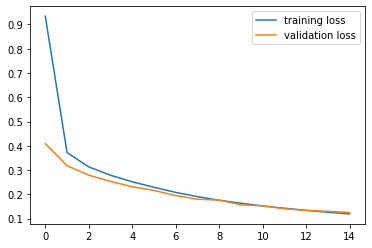

In [10]:
plt.plot(running_loss_history, label='training loss')
plt.plot(val_running_loss_history, label='validation loss')
plt.legend()

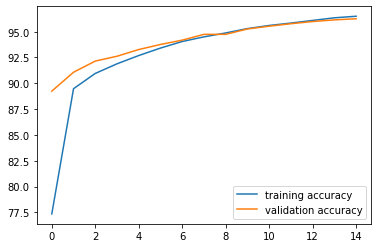

In [11]:
plt.plot(running_corrects_history, label='training accuracy')
plt.plot(val_running_corrects_history, label='validation accuracy')
plt.legend()

In [ ]:
# !pip3 install pillow==4.0.0

<Response [200]>


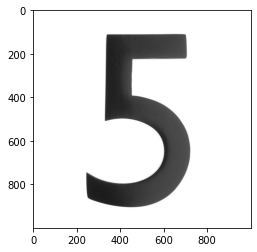

In [17]:
import PIL.ImageOps
import requests
from PIL import Image
url = 'https://images.homedepot-static.com/productImages/007164ea-d47e-4f66-8d8c-fd9f621984a2/svn/architectural-mailboxes-house-letters-numbers-3585b-5-64_1000.jpg'
response = requests.get(url, stream = True)
print(response)
img = Image.open(response.raw)
plt.imshow(img)

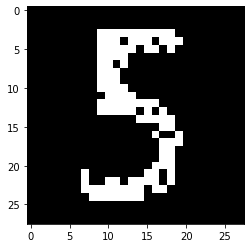

In [18]:
img = PIL.ImageOps.invert(img) # black background and white number
img = img.convert('1') # rgb to gray scale
img = transform(img) # resize and normalize
plt.imshow(im_convert(img))

In [20]:
img = img.view(img.shape[0], -1) # 1, 28, 28 -> 1, 784
output = model(img)
        
_, pred = torch.max(output, 1)
print(pred.item())

5


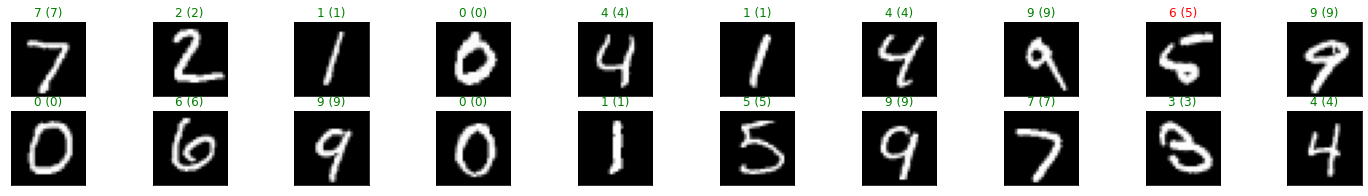

In [22]:
dataiter = iter(validation_loader)
images, labels = dataiter.next()
images_ = images.view(images.shape[0], -1)
output = model(images_)
_, preds = torch.max(output, 1)

fig = plt.figure(figsize=(25, 3))

for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(im_convert(images[idx]))
  ax.set_title('{} ({})'.format(str(preds[idx].item()), str(labels[idx].item())), color = ('green' if preds[idx] == labels[idx] else 'red'))